In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
import os

In [ ]:
data = pd.read_csv("../data/raw/MC_ALL_AO2D_LHC24b1-527108-AODS-1-8.csv", sep=",", index_col=0)


In [51]:
data.head()

,fTPCSignal,fTRDSignal,fTRDPattern,fTOFSignal,fBeta,fP,fPt,fPx,fPy,fPz,...,fX,fY,fZ,fAlpha,fTrackType,fTPCNClsShared,fDcaXY,fDcaZ,fPdgCode,fIsPhysicalPrimary
0,48.226562,NaN,NaN,16573.37,0.968934,0.550727,0.463749,-0.263934,0.381316,-0.297047,...,0.045109,0.027385,0.944241,2.176246,1,2,-0.000340,-0.002213,-211,1
1,58.446290,NaN,NaN,NaN,NaN,0.229267,0.226292,-0.222093,0.043393,-0.036812,...,0.051657,0.006251,0.926795,2.948638,1,2,0.017873,-0.019659,-211,1
2,54.855470,NaN,NaN,NaN,NaN,0.449411,0.446586,0.408183,0.181179,0.050309,...,-0.035656,0.038342,0.944575,0.417743,1,1,-0.000801,-0.001879,211,1
3,54.899414,NaN,NaN,NaN,NaN,0.425095,0.366725,-0.182667,-0.317994,0.214984,...,0.005663,-0.057105,0.939279,-2.092206,1,0,-0.004461,-0.007175,-211,1
4,63.075195,NaN,NaN,NaN,NaN,0.275273,0.265040,-0.036921,0.262456,0.074357,...,0.027856,0.047617,0.955744,1.710551,1,2,0.002589,0.009290,-211,1


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2980220 entries, 0 to 2980219
Data columns (total 21 columns):
 #   Column              Dtype  
---  ------              -----  
 0   fTPCSignal          float64
 1   fTRDSignal          float64
 2   fTRDPattern         float64
 3   fTOFSignal          float64
 4   fBeta               float64
 5   fP                  float64
 6   fPt                 float64
 7   fPx                 float64
 8   fPy                 float64
 9   fPz                 float64
 10  fSign               float64
 11  fX                  float64
 12  fY                  float64
 13  fZ                  float64
 14  fAlpha              float64
 15  fTrackType          int64  
 16  fTPCNClsShared      int64  
 17  fDcaXY              float64
 18  fDcaZ               float64
 19  fPdgCode            int64  
 20  fIsPhysicalPrimary  int64  
dtypes: float64(17), int64(4)
memory usage: 500.2 MB


In [53]:
data.isna().sum()

fTPCSignal                  0
fTRDSignal            2742976
fTRDPattern           2742976
fTOFSignal            2294315
fBeta                 2294315
fP                          0
fPt                         0
fPx                         0
fPy                         0
fPz                         0
fSign                       0
fX                          0
fY                          0
fZ                          0
fAlpha                      0
fTrackType                  0
fTPCNClsShared              0
fDcaXY                      0
fDcaZ                       0
fPdgCode                    0
fIsPhysicalPrimary          0
dtype: int64

In [54]:
data["fPdgCode"].value_counts()

fPdgCode
-211           1252331
 211           1250704
 321            107931
-321            104541
 2212            64068
 13              54814
-13              54669
-2212            54162
 11              18797
-11              17984
 1000010020        185
 1000010030         17
 1000010040          7
 1000020040          7
 1000020030          3
Name: count, dtype: int64

In [60]:
selected_pdg1 = [-211, 211, 321, -321, 2212, -2212, 13, -13, 11, -11]
filtered_data = data[data["fPdgCode"].isin(selected_pdg1)]
filtered_data1 = filtered_data.dropna(subset=["fTRDSignal", "fTRDPattern", "fTOFSignal", "fBeta"])

In [61]:
filtered_data1["fPdgCode"].value_counts()

fPdgCode
 211     45823
-211     43361
 321      5437
-321      4929
 2212     3846
-2212     3390
-13       1073
 13        974
-11        194
 11        161
Name: count, dtype: int64

In [62]:
filtered_data["fPdgCode"].value_counts()

fPdgCode
-211     1252331
 211     1250704
 321      107931
-321      104541
 2212      64068
 13        54814
-13        54669
-2212      54162
 11        18797
-11        17984
Name: count, dtype: int64

Balancing data

In [63]:
from sklearn.utils import resample
min_samples=5000
balanced_data = []

for label in filtered_data["fPdgCode"].unique():
    subset = filtered_data[filtered_data["fPdgCode"] == label]
    balanced_subset = resample(subset, replace=False, n_samples=min_samples, random_state=123)
    balanced_data.append(balanced_subset)

balanced_df = pd.concat(balanced_data)
balanced_df["fPdgCode"].value_counts()

fPdgCode
-211     5000
 211     5000
 321     5000
 2212    5000
-13      5000
-2212    5000
 11      5000
-321     5000
-11      5000
 13      5000
Name: count, dtype: int64

In [21]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1031679 to 1265028
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fTPCSignal          50000 non-null  float64
 1   fTRDSignal          3813 non-null   float64
 2   fTRDPattern         3813 non-null   float64
 3   fTOFSignal          10164 non-null  float64
 4   fBeta               10164 non-null  float64
 5   fP                  50000 non-null  float64
 6   fPt                 50000 non-null  float64
 7   fPx                 50000 non-null  float64
 8   fPy                 50000 non-null  float64
 9   fPz                 50000 non-null  float64
 10  fSign               50000 non-null  float64
 11  fX                  50000 non-null  float64
 12  fY                  50000 non-null  float64
 13  fZ                  50000 non-null  float64
 14  fAlpha              50000 non-null  float64
 15  fTrackType          50000 non-null  int64  
 16  f

In [31]:
variables = ["fP", "fPt", "fPx", "fPy", "fPz", "fSign", 
             "fX", "fY", "fZ", "fAlpha", "fTrackType", 
             "fTPCNClsShared", "fDcaXY", "fDcaZ", "fPdgCode"]

In [32]:
balanced_df_selected=balanced_df[variables]

In [33]:
balanced_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1031679 to 1265028
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fP              50000 non-null  float64
 1   fPt             50000 non-null  float64
 2   fPx             50000 non-null  float64
 3   fPy             50000 non-null  float64
 4   fPz             50000 non-null  float64
 5   fSign           50000 non-null  float64
 6   fX              50000 non-null  float64
 7   fY              50000 non-null  float64
 8   fZ              50000 non-null  float64
 9   fAlpha          50000 non-null  float64
 10  fTrackType      50000 non-null  int64  
 11  fTPCNClsShared  50000 non-null  int64  
 12  fDcaXY          50000 non-null  float64
 13  fDcaZ           50000 non-null  float64
 14  fPdgCode        50000 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 6.1 MB


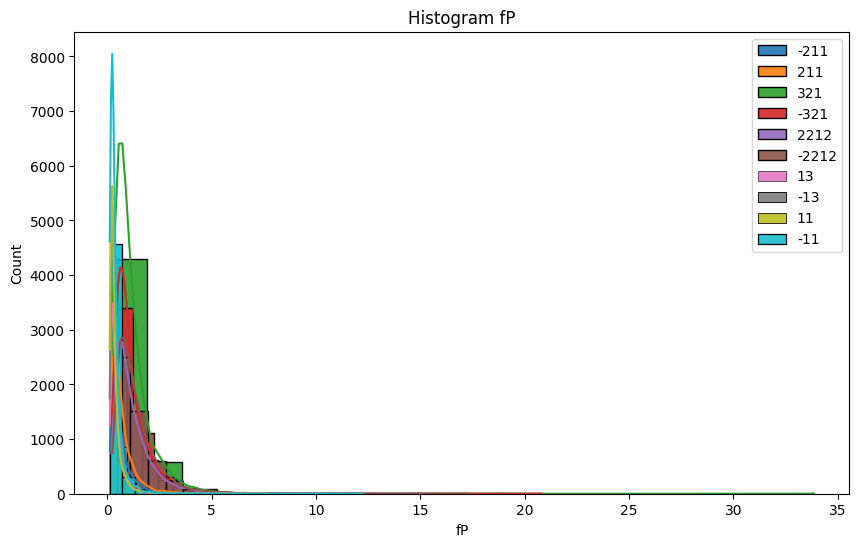

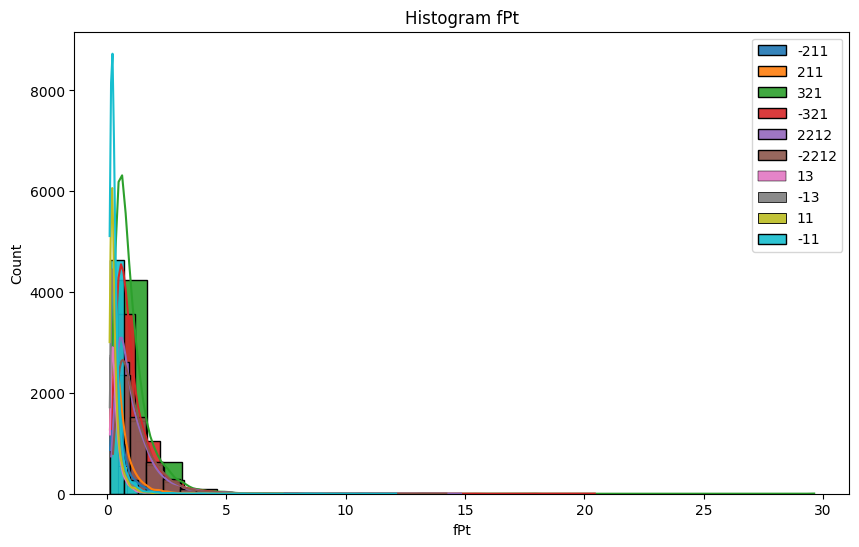

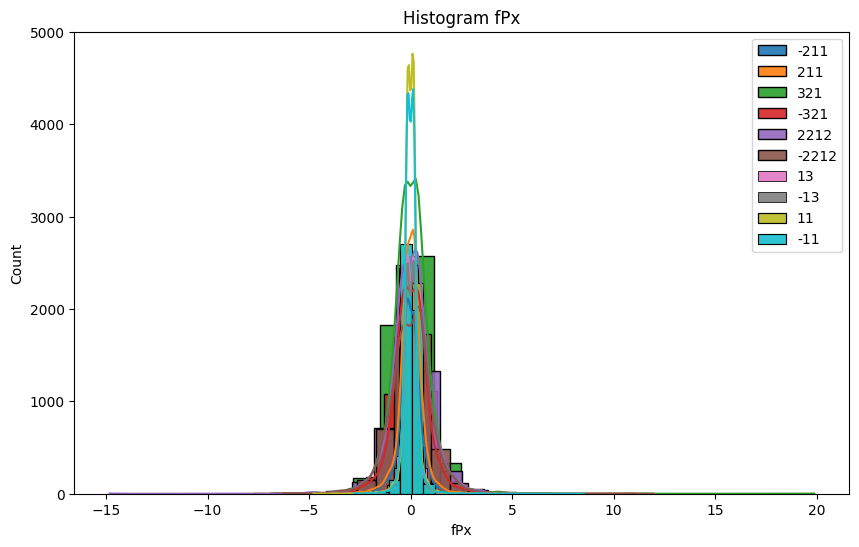

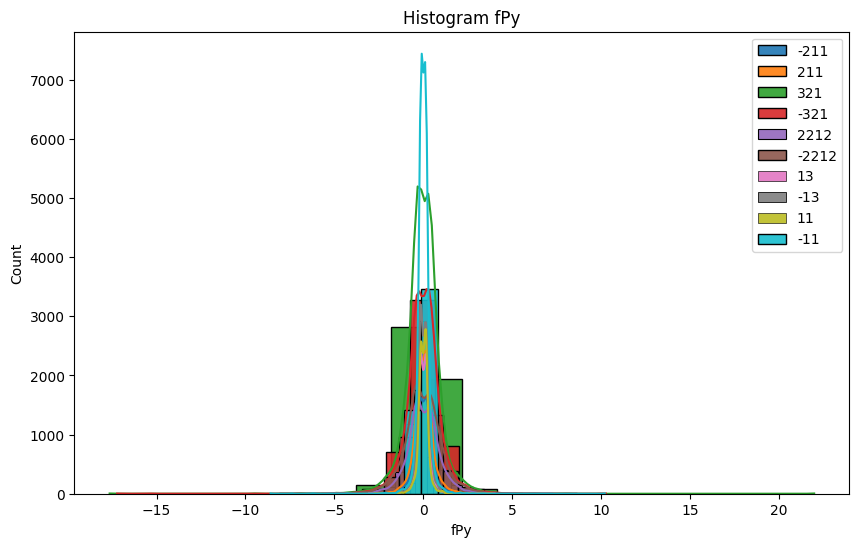

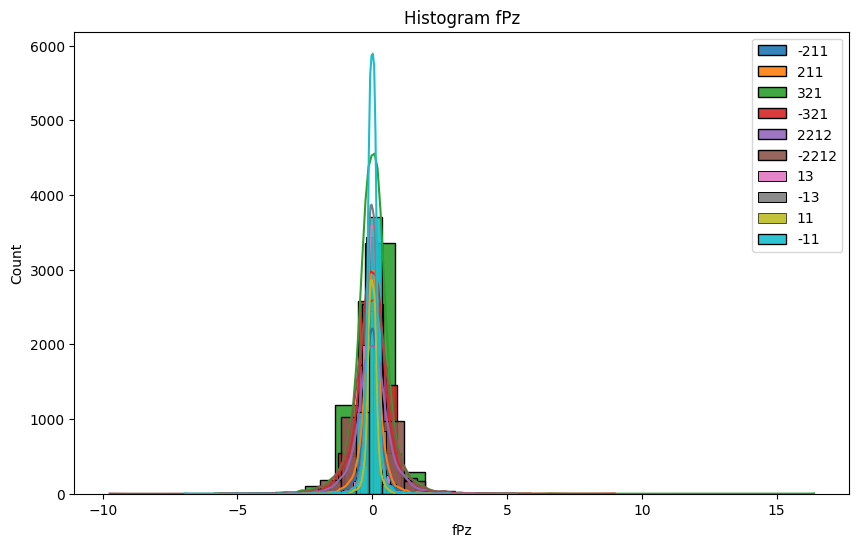

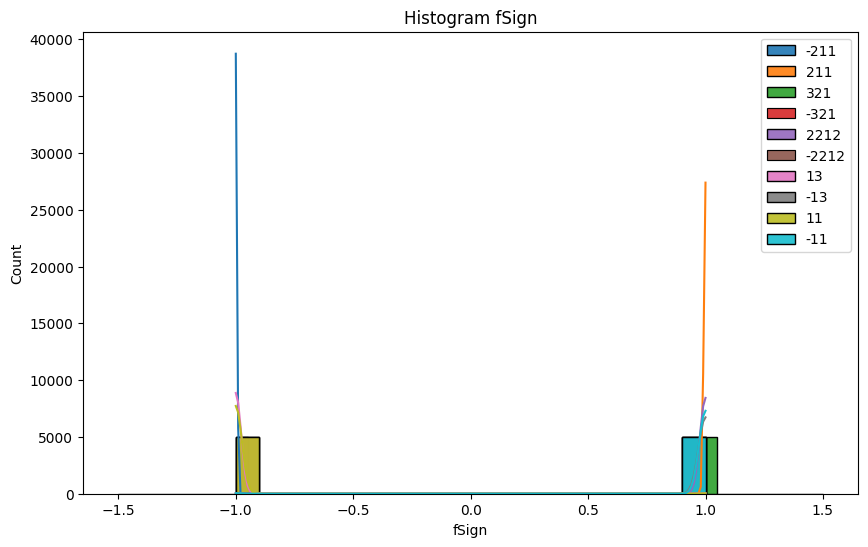

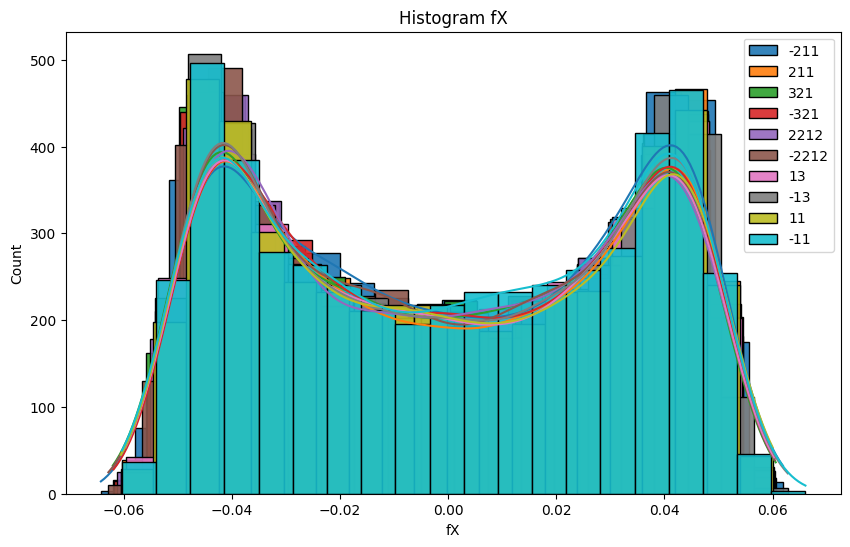

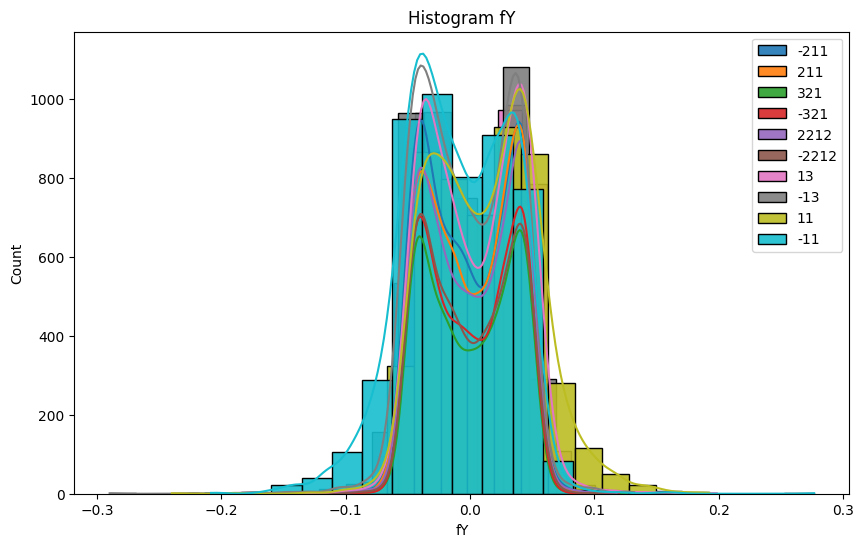

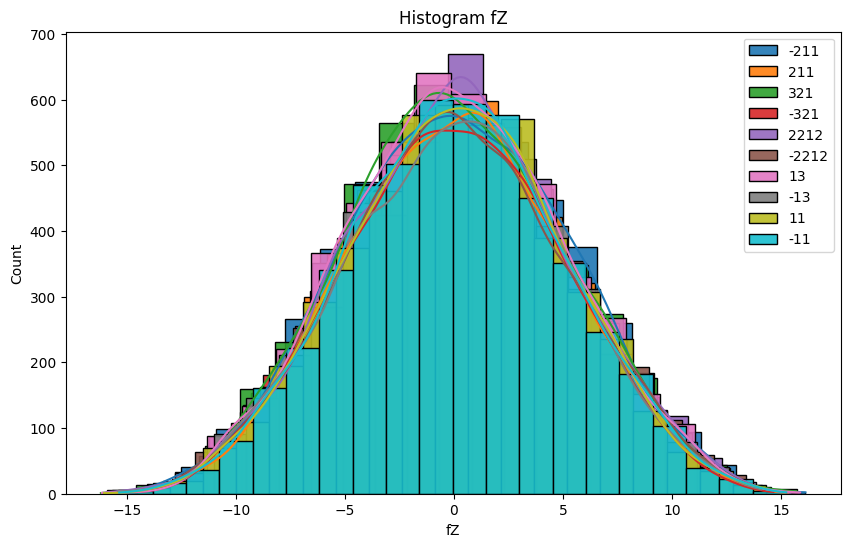

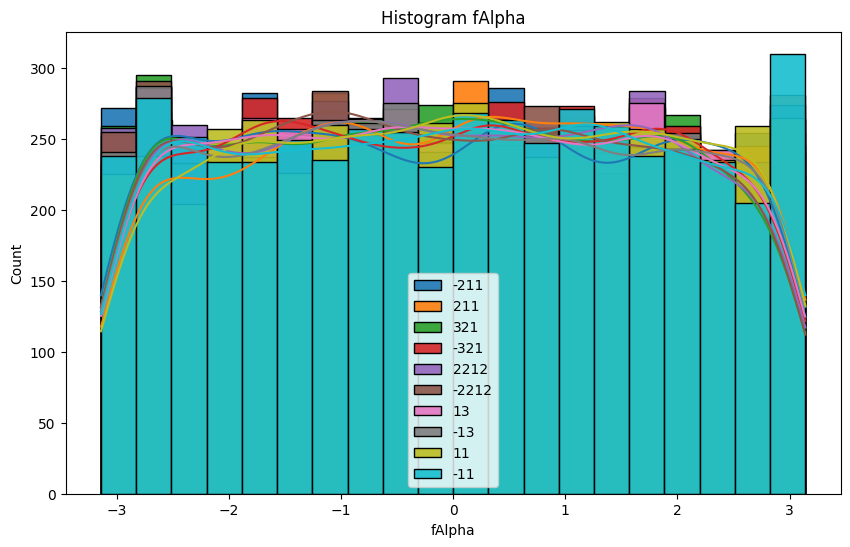

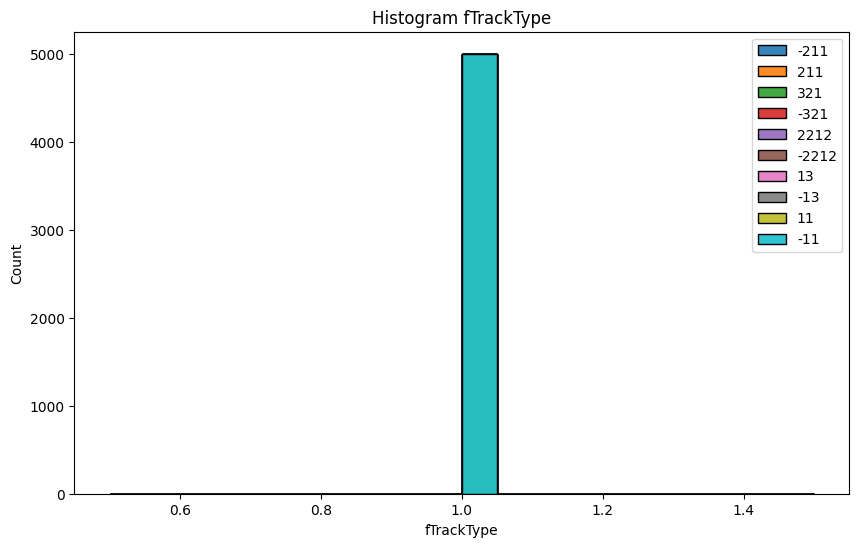

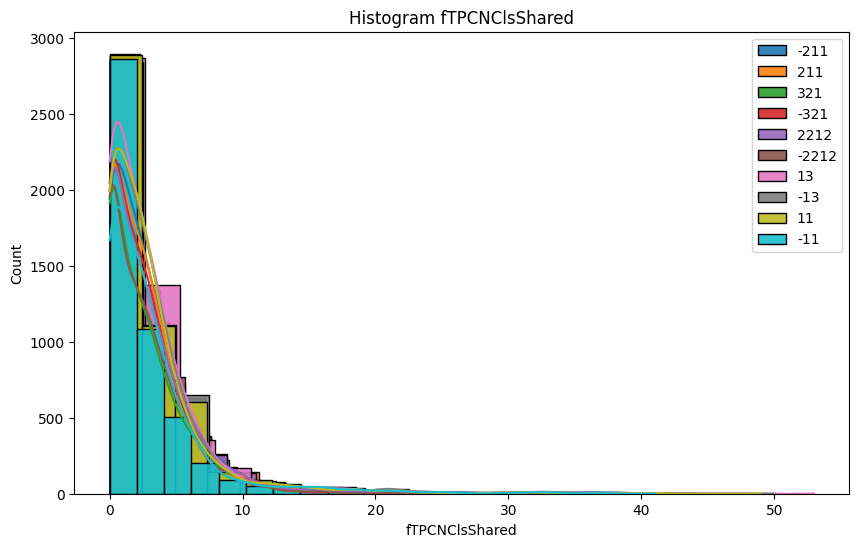

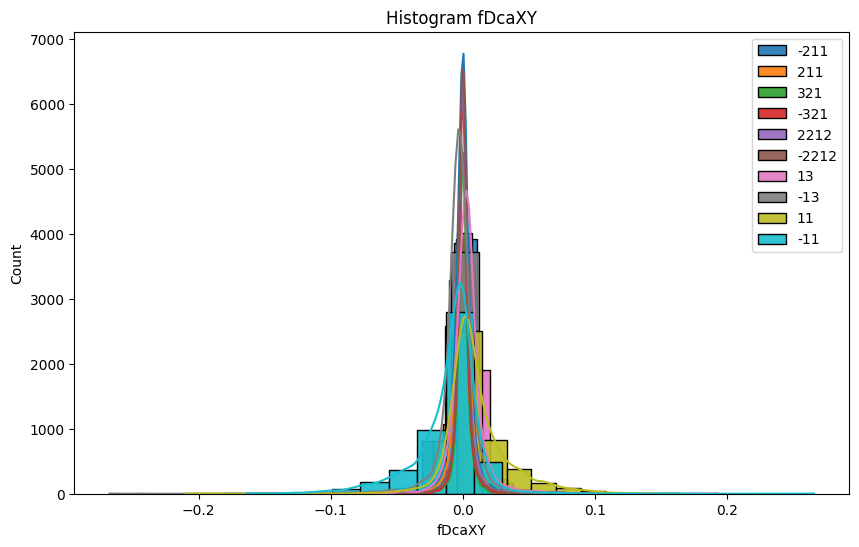

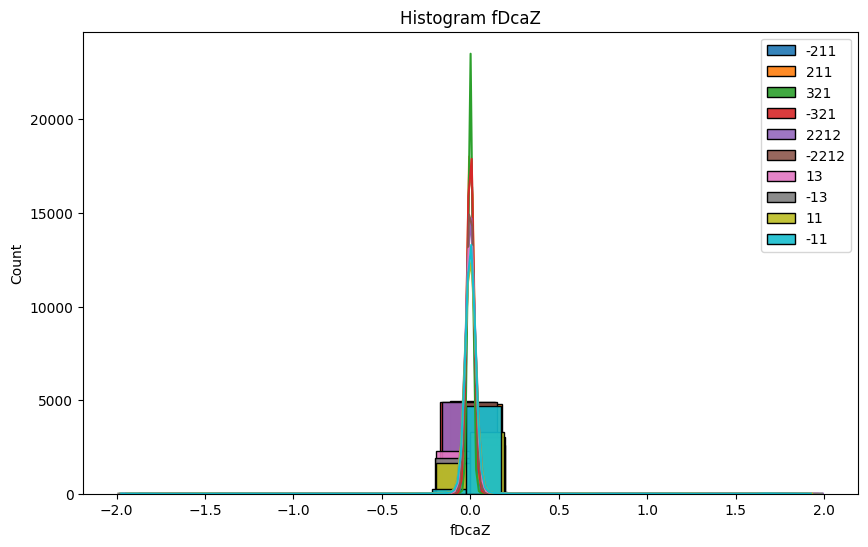

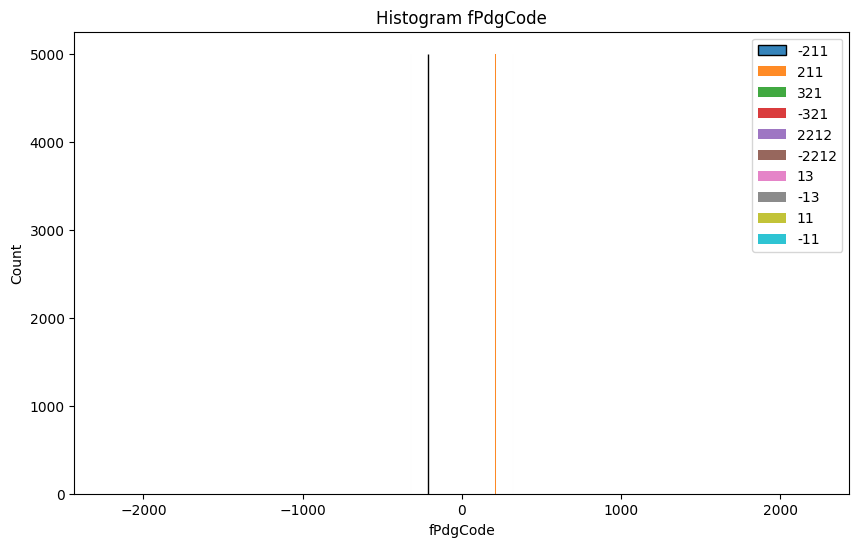

In [38]:
def plot_histograms(df, variables, selected_pdg):
    for var in variables:
        plt.figure(figsize=(10, 6))
        for pdg in selected_pdg:
            sns.histplot(df[df["fPdgCode"] == pdg][var], bins=20, kde=True, label=pdg, alpha=0.9)
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.title(f"Histogram {var}")
        plt.legend()
        plt.show()

selected_pdg1=[-211, 211, 321, -321, 2212, -2212, 13, -13, 11, -11]
plot_histograms(balanced_df_selected, variables, selected_pdg1)

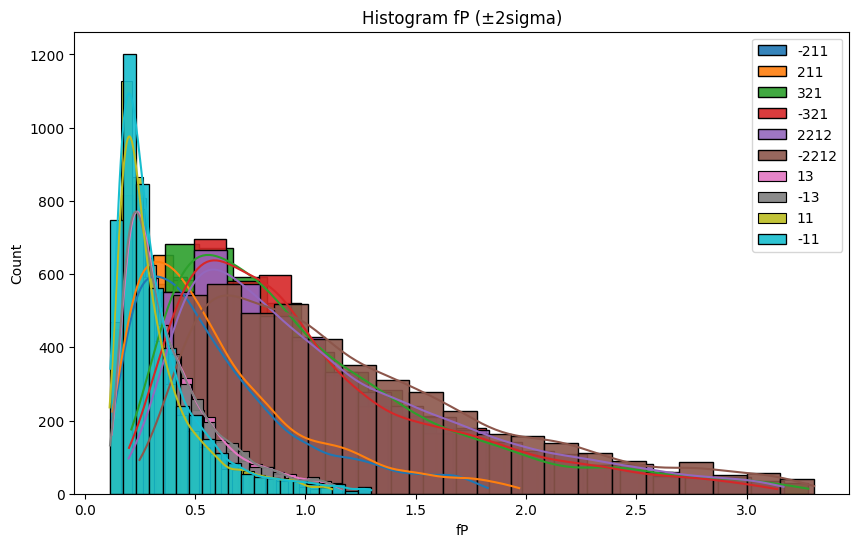

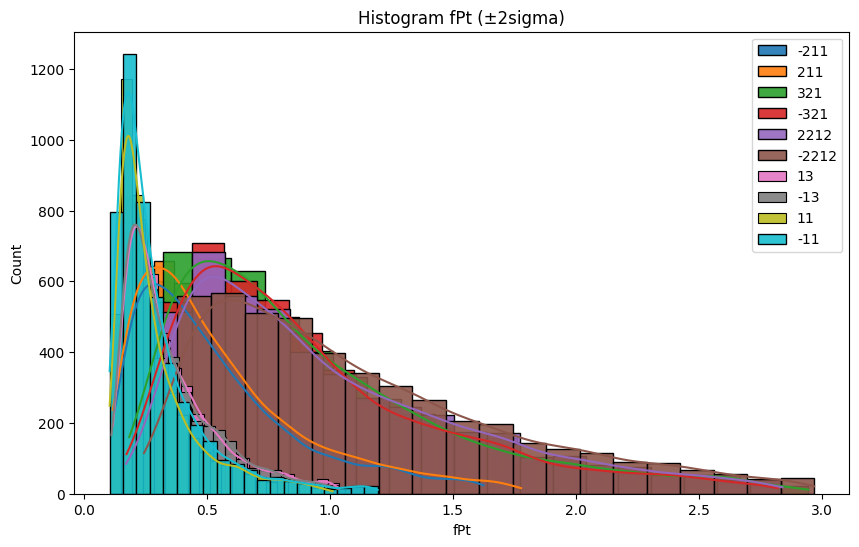

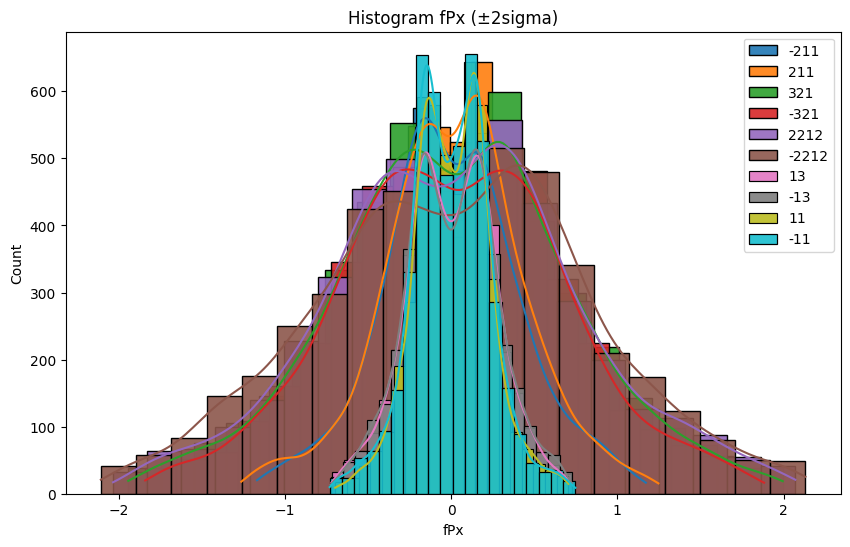

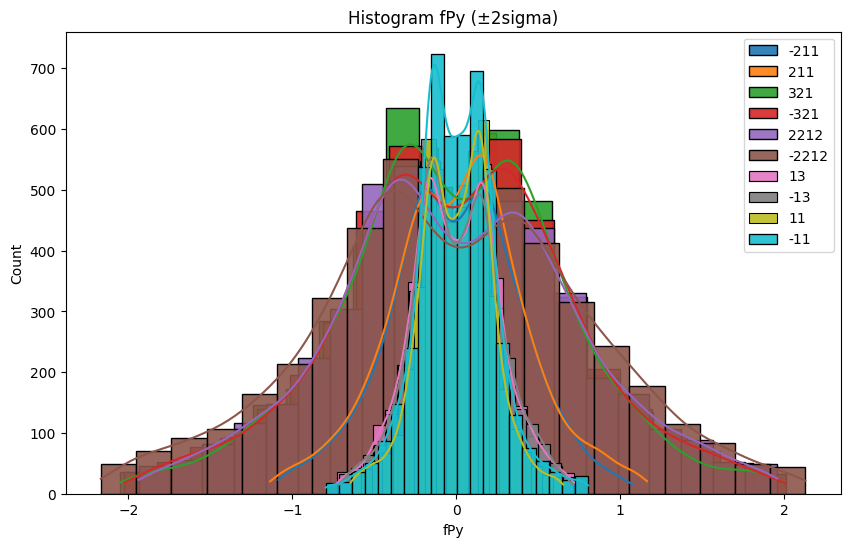

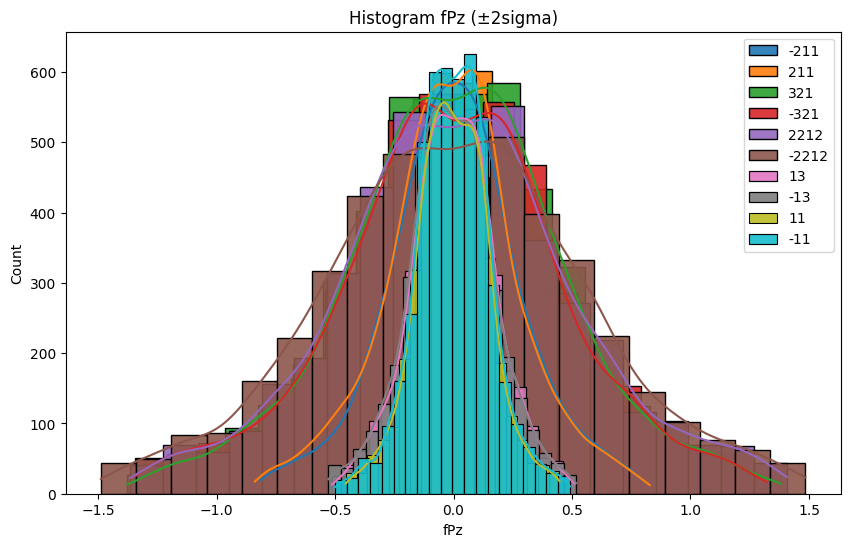

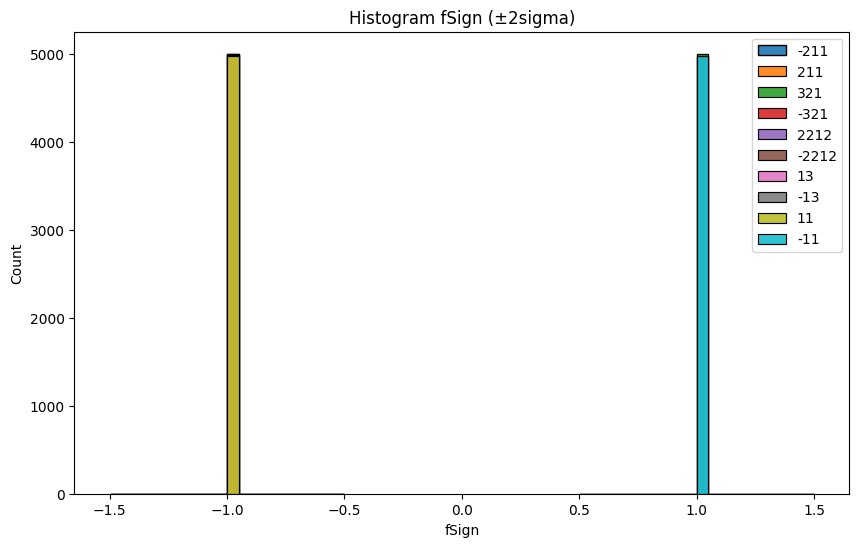

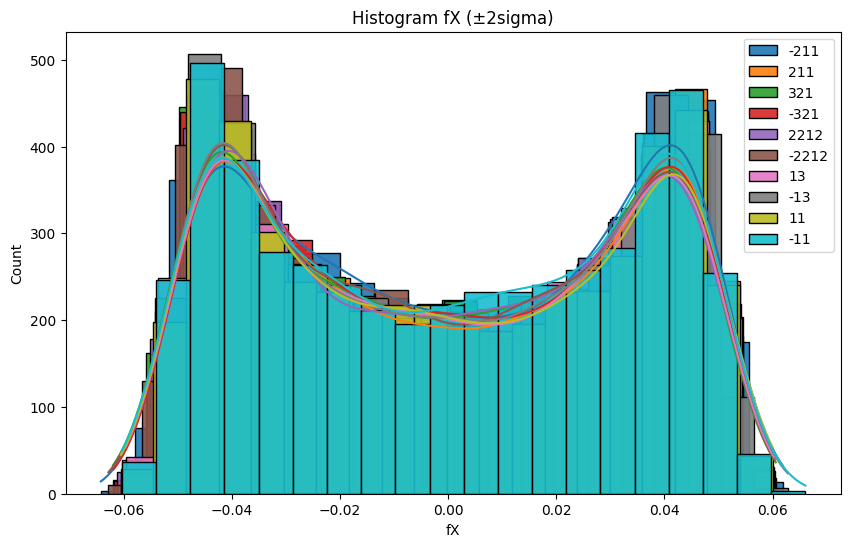

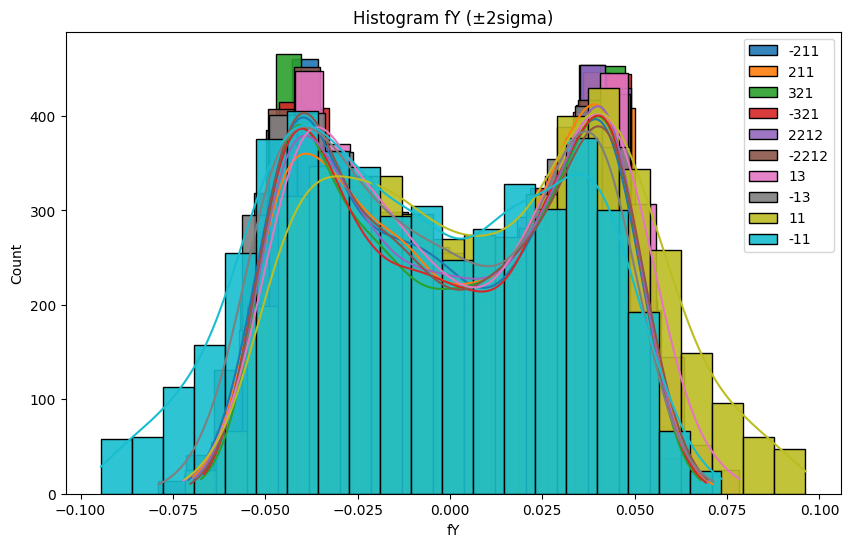

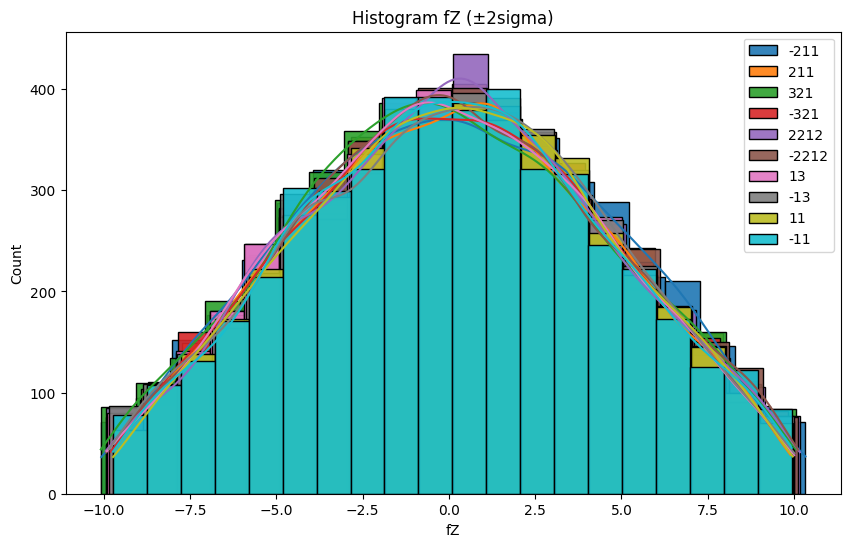

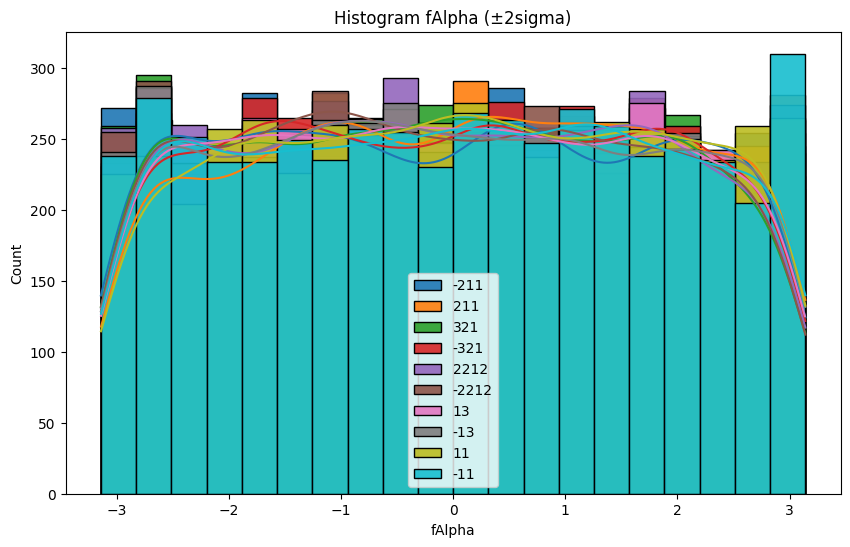

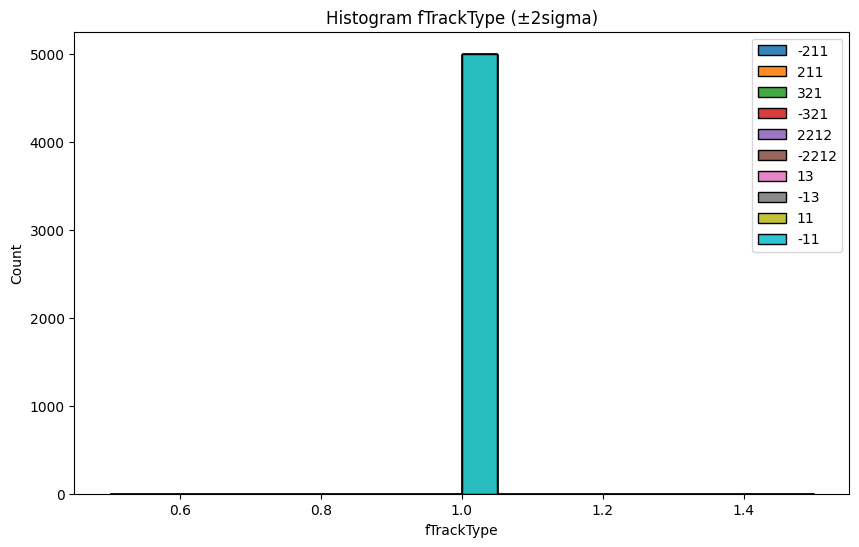

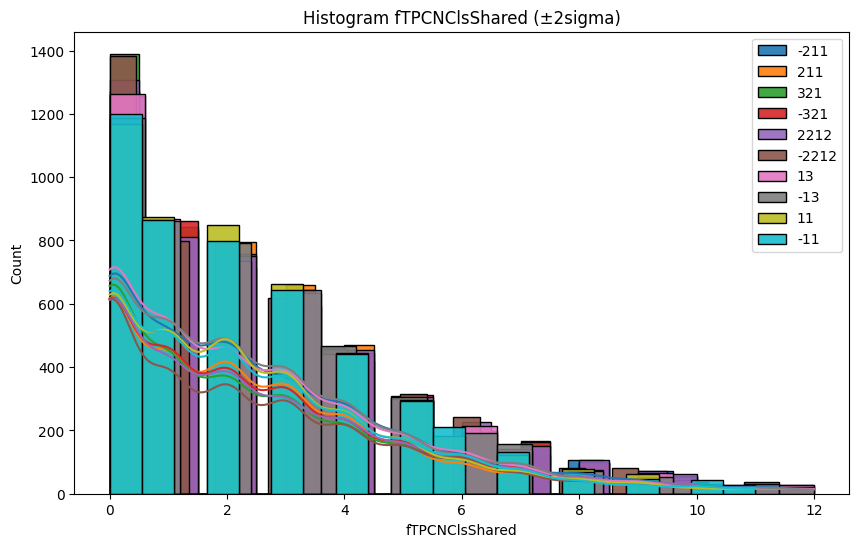

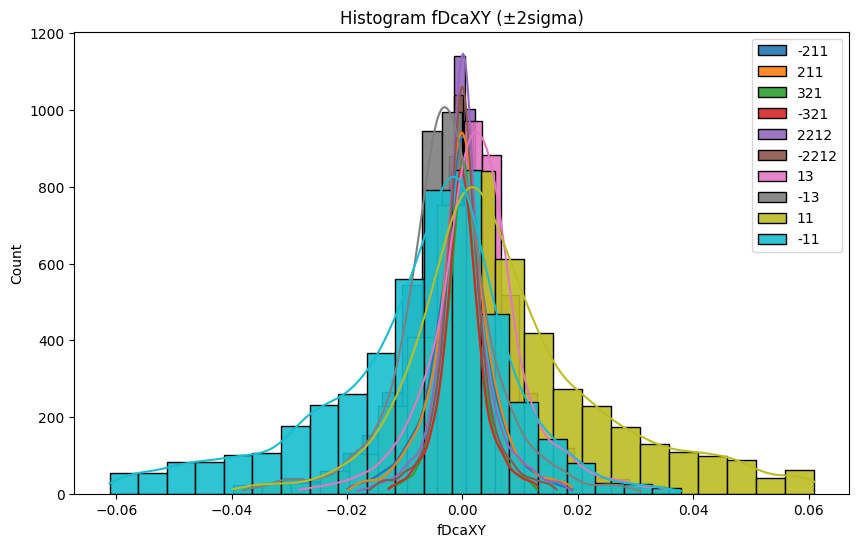

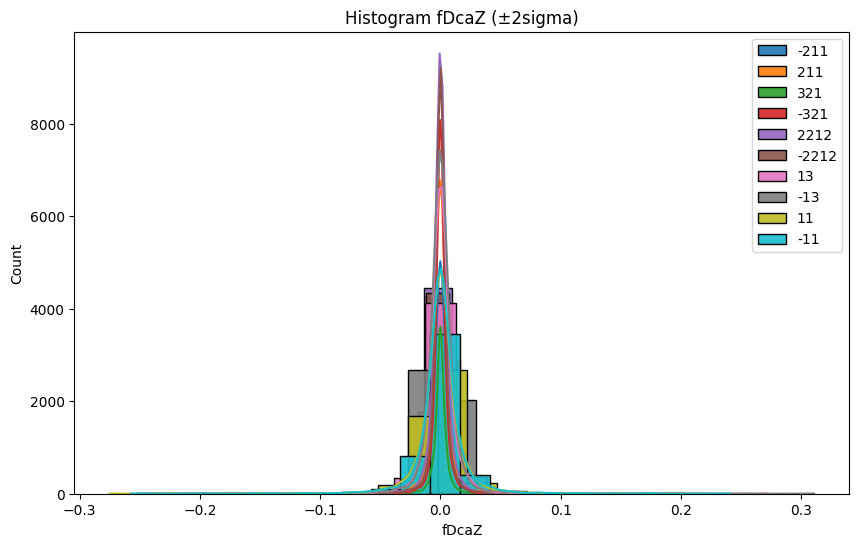

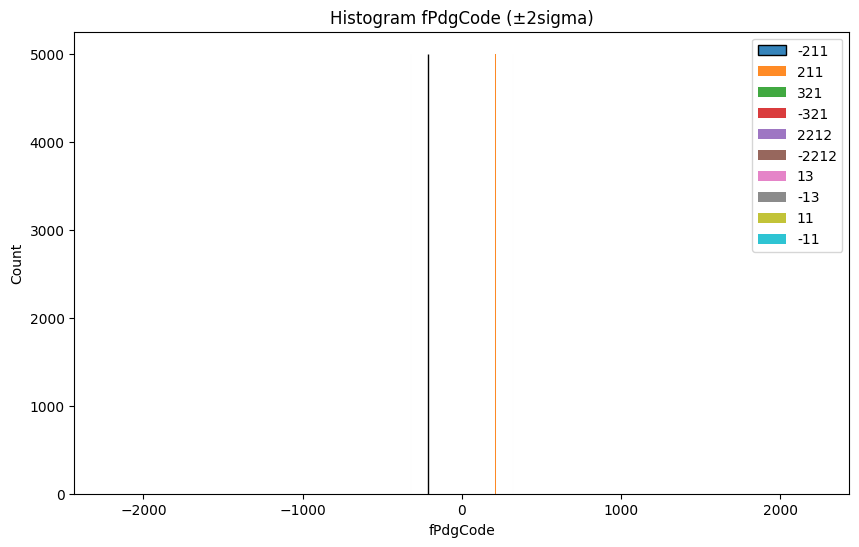

In [40]:
def plot_histograms_2_sigma(df, variables, selected_pdg):
    for var in variables:
        plt.figure(figsize=(10, 6))
        for pdg in selected_pdg:
            data = df[df["fPdgCode"] == pdg][var]

            mean = data.mean()
            std = data.std()
            filtered_data = data[(data >= mean - 2 * std) & (data <= mean + 2 * std)]
            
            sns.histplot(filtered_data, bins=20, kde=True, label=pdg, alpha=0.9)
        
        plt.xlabel(var)
        plt.ylabel("Count")
        plt.title(f"Histogram {var} (±2sigma)")
        plt.legend()
        plt.show()

selected_pdg1=[-211, 211, 321, -321, 2212, -2212, 13, -13, 11, -11]
plot_histograms_2_sigma(balanced_df_selected, variables, selected_pdg1)

In [73]:
variables = ["fP", "fPt", "fPx", "fPy", "fPz", "fSign", 
             "fX", "fY", "fZ", "fAlpha", "fTrackType", 
             "fTPCNClsShared", "fDcaXY", "fDcaZ"]

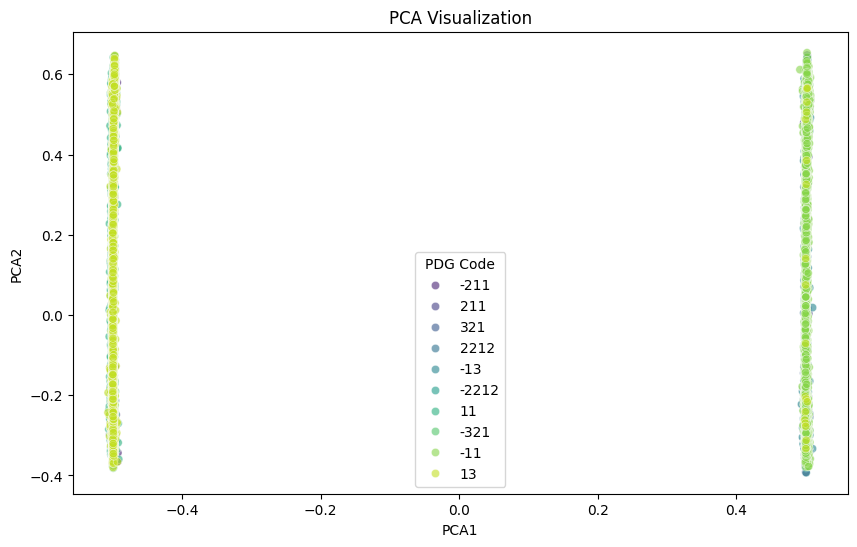

Explained variance PCA1: 0.57
Explained variance PCA2: 0.24


In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
def perform_pca_analysis(df, selected_pdg, variables):
    filtered_df = df[df["fPdgCode"].isin(selected_pdg)]
    data_clean = filtered_df[variables]
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data_clean)
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_scaled)
    filtered_df["PCA1"] = pca_result[:, 0]
    filtered_df["PCA2"] = pca_result[:, 1]
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=filtered_df["PCA1"], y=filtered_df["PCA2"],
        hue=filtered_df["fPdgCode"].astype(str), palette="viridis", alpha=0.6
    )
    plt.xlabel("PCA1")
    plt.ylabel("PCA2")
    plt.title("PCA Visualization")
    plt.legend(title="PDG Code")
    plt.show()
    
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance PCA1: {explained_variance[0]:.2f}")
    print(f"Explained variance PCA2: {explained_variance[1]:.2f}")

selected_pdg1 = [-211, 211, 321, -321, 2212, 13, -13, -2212, 11, -11]
perform_pca_analysis(balanced_df_selected, selected_pdg1, variables)

C:\Users\Kuba\AppData\Local\Temp\ipykernel_17348\1614691296.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["PCA1"] = pca_result[:, 0]
C:\Users\Kuba\AppData\Local\Temp\ipykernel_17348\1614691296.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["PCA2"] = pca_result[:, 1]


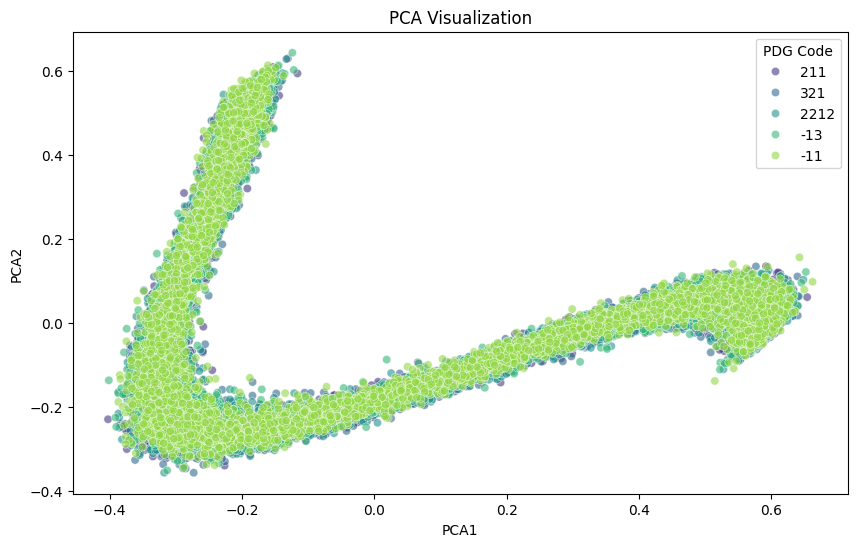

Explained variance PCA1: 0.54
Explained variance PCA2: 0.25


In [76]:
selected_pdg2 = [211, 321, 2212, -13, -11]
perform_pca_analysis(balanced_df_selected, selected_pdg2, variables)

C:\Users\Kuba\AppData\Local\Temp\ipykernel_17348\1614691296.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["PCA1"] = pca_result[:, 0]
C:\Users\Kuba\AppData\Local\Temp\ipykernel_17348\1614691296.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["PCA2"] = pca_result[:, 1]


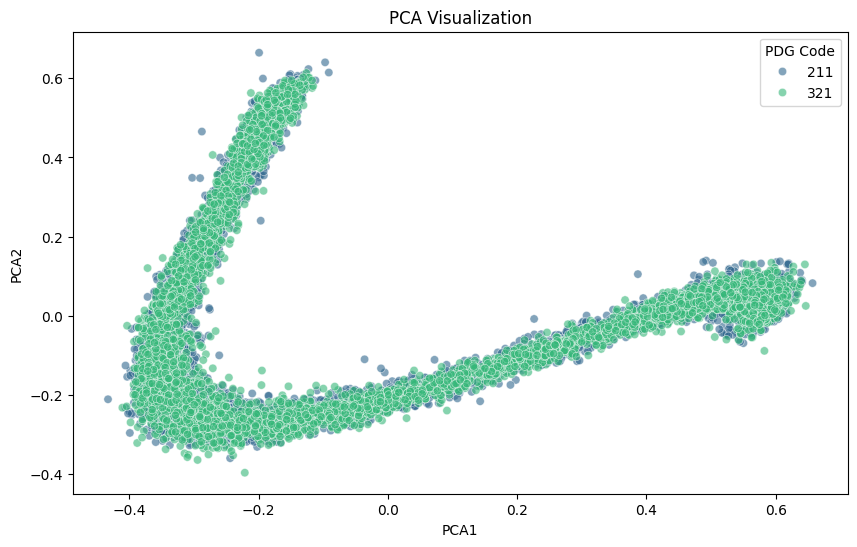

Explained variance PCA1: 0.54
Explained variance PCA2: 0.26


In [80]:
selected_pdg3 = [211, 321]
perform_pca_analysis(balanced_df_selected, selected_pdg3, variables)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def train_random_forest(df, feature_variables, target_variable="fPdgCode"):
    X = df[feature_variables]
    y = df[target_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    
    model = RandomForestClassifier(n_estimators=100, random_state=123)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

train_random_forest(balanced_df_selected, variables, "fPdgCode")

Accuracy: 0.38
Classification Report:
              precision    recall  f1-score   support

       -2212       0.40      0.54      0.46      1506
        -321       0.33      0.27      0.30      1558
        -211       0.29      0.26      0.28      1438
         -13       0.37      0.36      0.37      1517
         -11       0.49      0.49      0.49      1505
          11       0.54      0.50      0.52      1576
          13       0.39      0.39      0.39      1488
         211       0.28      0.22      0.24      1476
         321       0.32      0.34      0.33      1469
        2212       0.38      0.45      0.41      1467

    accuracy                           0.38     15000
   macro avg       0.38      0.38      0.38     15000
weighted avg       0.38      0.38      0.38     15000

